# Fashion MNIST Classification with Keras and TensorFlow

---

## Objective
The goal of this project is to build a multiclass classification model using Keras with TensorFlow backend to classify fashion items from the Fashion MNIST dataset. The model will use a dense neural network architecture, with techniques like dropout and batch normalization to improve generalization, aiming for a minimum accuracy of 90% on the test set.

## Dataset Description: Fashion MNIST
The **Fashion MNIST** dataset is an alternative to the classic MNIST dataset of handwritten digits. It consists of grayscale images of clothing items in 10 different categories, with 70,000 total images, where:
- **60,000 images** are used for training.
- **10,000 images** are used for testing.

Each image has dimensions **28x28 pixels** and belongs to one of the following **10 categories**:
1. T-shirt/top
2. Trouser
3. Pullover
4. Dress
5. Coat
6. Sandal
7. Shirt
8. Sneaker
9. Bag
10. Ankle boot

The dataset is available directly through `keras.datasets` as a built-in feature.

## Instructions for Running the Code in Jupyter Notebook
1. **Load Dependencies**: Ensure all required libraries are installed (see dependencies below).
2. **Run Each Code Cell Sequentially**: Begin by loading the dataset and performing data preprocessing steps. Follow each cell to visualize data, define the model architecture, compile and train the model, and evaluate results.
3. **Review Model Performance and Visualizations**: After training, review the accuracy, classification report, confusion matrix, and visualizations for model insights.

## Dependencies and Installation Instructions
Before running this notebook, install the following libraries if they are not already available in your environment:

```python
!pip install tensorflow numpy matplotlib seaborn pandas


In [ ]:
# Import necessary libraries
import tensorflow as tf
from tensorflow.keras import layers, models, optimizers, callbacks
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

In [ ]:
# Load Fashion MNIST dataset
fashion_mnist = tf.keras.datasets.fashion_mnist
(x_train_full, y_train_full), (x_test, y_test) = fashion_mnist.load_data()



In [ ]:
# Normalize pixel values to be between 0 and 1
x_train_full, x_test = x_train_full / 255.0, x_test / 255.0

In [ ]:
# Split the data into training and validation sets (80% train, 20% validation)
x_train, x_val = x_train_full[:48000], x_train_full[48000:]
y_train, y_val = y_train_full[:48000], y_train_full[48000:]


In [ ]:
# Flatten the images to 784-dimensional vectors (28 * 28)
x_train = x_train.reshape(-1, 28*28)
x_val = x_val.reshape(-1, 28*28)
x_test = x_test.reshape(-1, 28*28)

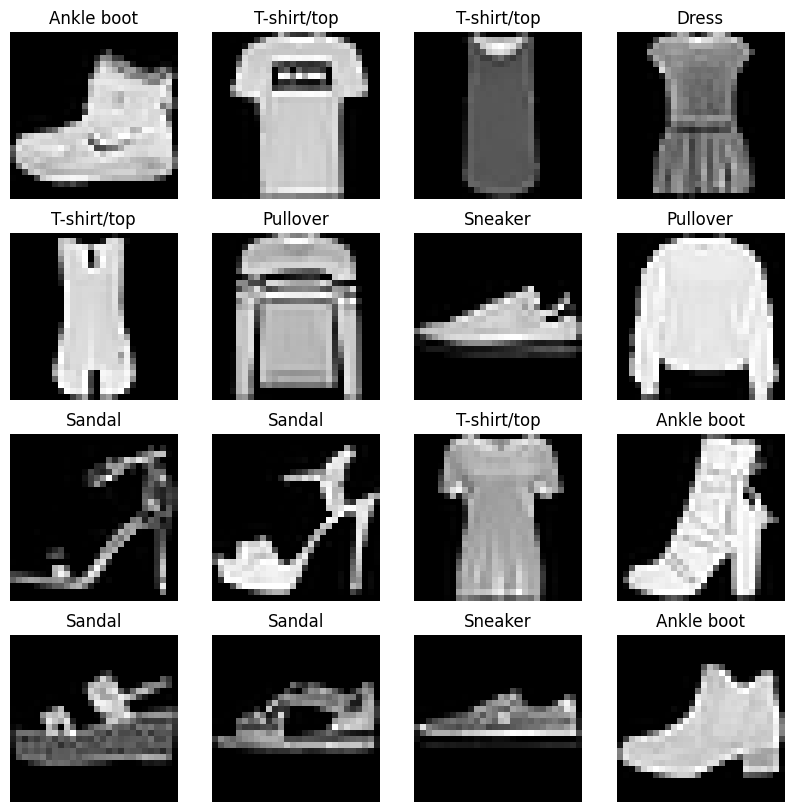

In [ ]:
# Visualize some images with labels for reference
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat", "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]
plt.figure(figsize=(10, 10))
for i in range(16):
    plt.subplot(4, 4, i+1)
    plt.imshow(x_train_full[i].reshape(28, 28), cmap='gray')
    plt.title(class_names[y_train_full[i]])
    plt.axis('off')
plt.show()

In [ ]:
# Build the model using Keras Sequential API
model = models.Sequential([
    layers.Input(shape=(784,)),                # Input layer (flattened 784-dimensional vector)
    layers.BatchNormalization(),               # Batch normalization layer
    layers.Dropout(0.2),                       # Dropout layer for regularization
    layers.Dense(128, activation='elu'),      # First hidden layer with 128 neurons and elu activation
    layers.Dropout(0.2),                       # Dropout layer for regularization
    layers.Dense(64, activation='elu'),       # Second hidden layer with 64 neurons and elu activation
    layers.Dense(10, activation='softmax')     # Output layer with 10 neurons and softmax activation for probabilities
])

In [ ]:
# Compile the model
model.compile(
    optimizer=optimizers.Adam(learning_rate=0.001), # Adam optimizer with a specific learning rate
    loss='sparse_categorical_crossentropy',        # Sparse categorical crossentropy for multiclass classification
    metrics=['accuracy']                           # Track accuracy during training
)

In [ ]:
# Set up callbacks
early_stopping = callbacks.EarlyStopping(monitor='val_loss', patience=8, restore_best_weights=True)
lr_scheduler = callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=7)

In [ ]:
# Train the model on the training data with an 80-20 split for validation
history = model.fit(
    x_train, y_train,
    epochs=50,
    batch_size=64,
    validation_data=(x_val, y_val),
    callbacks=[early_stopping, lr_scheduler]
)

Epoch 1/50
750/750 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.7537 - loss: 0.7049 - val_accuracy: 0.8558 - val_loss: 0.3954 - learning_rate: 0.0010
Epoch 2/50
750/750 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8402 - loss: 0.4369 - val_accuracy: 0.8638 - val_loss: 0.3736 - learning_rate: 0.0010
Epoch 3/50
750/750 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8554 - loss: 0.3961 - val_accuracy: 0.8706 - val_loss: 0.3543 - learning_rate: 0.0010
Epoch 4/50
750/750 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8637 - loss: 0.3684 - val_accuracy: 0.8763 - val_loss: 0.3441 - learning_rate: 0.0010
Epoch 5/50
750/750 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8695 - loss: 0.3498 - val_accuracy: 0.8792 - val_loss: 0.3260 - learning_rate: 0.0010
Epoch 6/50
750/750 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8771 - loss: 0.3337 - val_accuracy: 0.8842 - val_loss: 0.3134 - learning_rate: 0.0010
Epoch 7/50
750/750 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8813 - loss: 0.3187 - 

In [ ]:
# Evaluate the model on the test set
test_loss, test_accuracy = model.evaluate(x_test, y_test)
print(f"Test Accuracy: {int(round(test_accuracy * 100))}%")

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9002 - loss: 0.2990
Test Accuracy: 90%


In [ ]:
# Generate a classification report
y_pred = np.argmax(model.predict(x_test), axis=1)
print(classification_report(y_test, y_pred, target_names=class_names))

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
              precision    recall  f1-score   support

 T-shirt/top       0.84      0.86      0.85      1000
     Trouser       0.99      0.98      0.98      1000
    Pullover       0.81      0.83      0.82      1000
       Dress       0.90      0.92      0.91      1000
        Coat       0.83      0.85      0.84      1000
      Sandal       0.99      0.95      0.97      1000
       Shirt       0.76      0.70      0.73      1000
     Sneaker       0.94      0.97      0.96      1000
         Bag       0.98      0.97      0.98      1000
  Ankle boot       0.96      0.96      0.96      1000

    accuracy                           0.90     10000
   macro avg       0.90      0.90      0.90     10000
weighted avg       0.90      0.90      0.90     10000



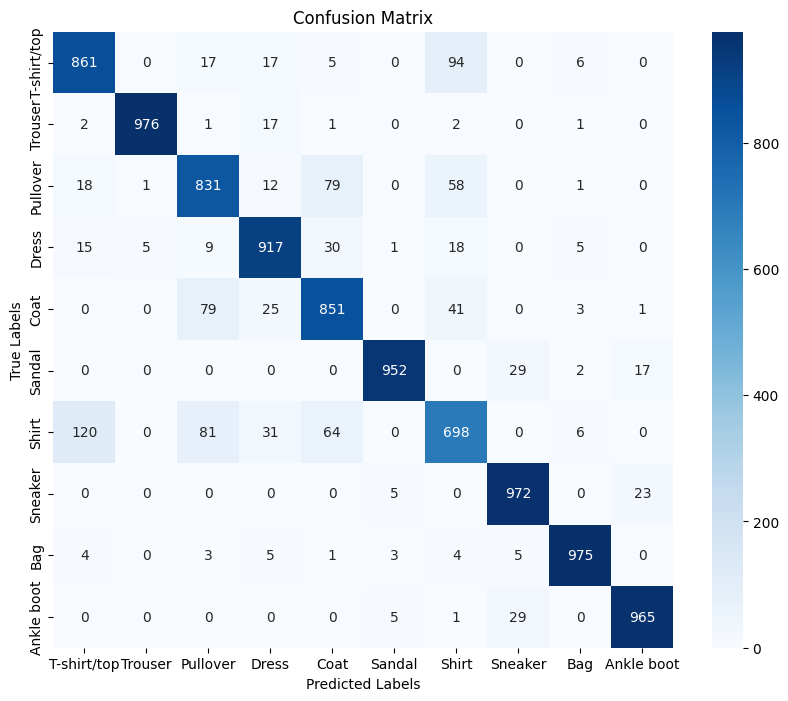

In [ ]:
# Plot confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix")
plt.show()

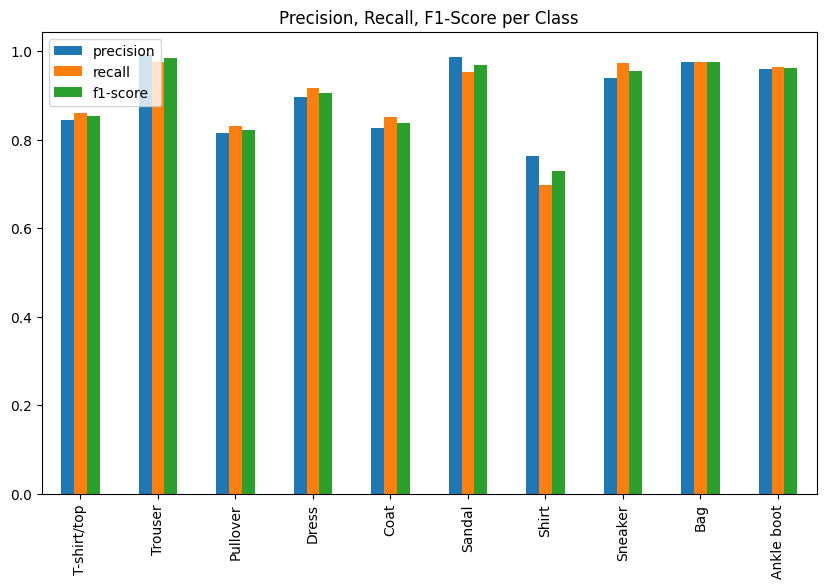

In [ ]:
# Plot bar graph for precision, recall, and F1-score
report = classification_report(y_test, y_pred, target_names=class_names, output_dict=True)
metrics_df = pd.DataFrame(report).T
metrics_df.iloc[:-3, :3].plot(kind='bar', figsize=(10, 6))
plt.title("Precision, Recall, F1-Score per Class")
plt.show()

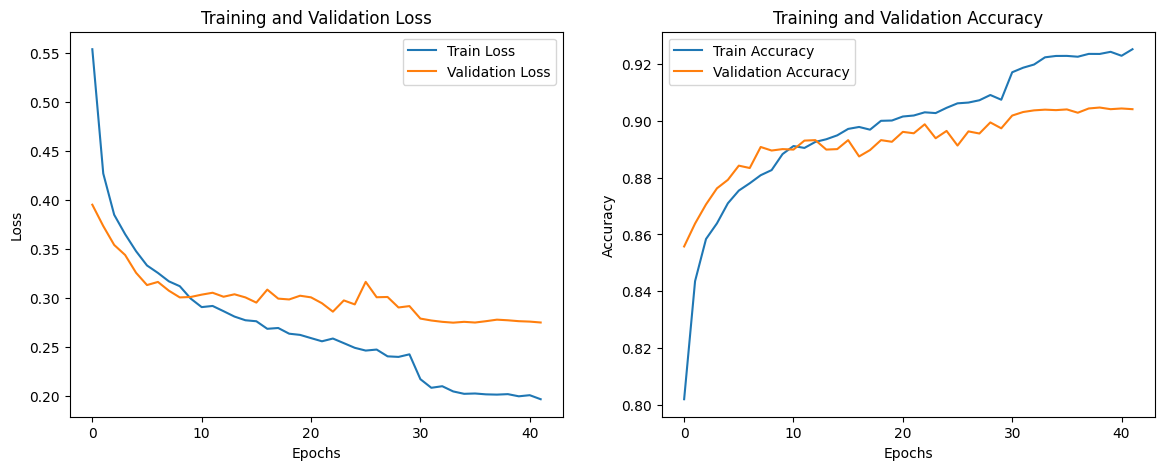

In [ ]:
# Visualize the loss and accuracy curves for both training and validation sets
plt.figure(figsize=(14, 5))
# Loss curve
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.title("Training and Validation Loss")
# Accuracy curve
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.title("Training and Validation Accuracy")
plt.show()